In [1]:
# Only needed imports of Final Report
import wrangle as w
import model as m

---

# <u>Predicting Pass or Run for Offenses in the NFL<u>
#### Reported by Jerry Nolf - April 27, 2022

---

### Project Description:
The NFL has been one of the largest organizations to introduce analytics into its multi-faceted operation and has made available very useful information that can help in better understanding the ever-changing game of American football.

This project is a scenario that a Defensive Coordinator has asked for a report on how offensive mindsets have changed over the last 5 seasons and whether or not available data can be used in order to better predict offensive play outcomes.


#### Project Goals:
In order to provide an idea of the impact NFL data has, I will be taking play-by-play data from the past 5 seasons (2017-2021) and using it in order to predict whether an offensive play will be will result in a pass or a run.

---

### Acquiring the data:

Our data will be acquired through the 'NFL Savant' website. This site has multiple databased already made into csv files and ready to download. The csv files we will be using are as follows:

    - play_by_play_2017
    - play_by_play_2018
    - play_by_play_2019
    - play_by_play_2020
    - play_by_play_2021
    
After downloading the appropriate files, they will be stored in the same directory in order to be acquired and merged together so that all information for the past 5 season is in dataframe. To streamline this process for future, the following function was created and can be used out of the wrangle.py file...

In [2]:
# Acquire with function from wrangle.py
df = w.acquire_play_by_play()
df.shape

plays-2019.csv acquired
plays-2018.csv acquired
plays-2020.csv acquired
plays-2021.csv acquired
plays-2017.csv acquired


(221479, 46)

As seen above, all five seasons have been been acquring and concatenated together form a single dataframe that contains 221,479 plays(rows) with information for each available in 46 columns.

---

### Preparing the data:
Once acquired, we will be cleaning our data in order to more efficiently and effectively meet our needs. In order to ensure all relevant data is available, we will do the following:

    - Drop columns that are deemed unnecessary to predict pass such as penalty information, whether the tema won, game id tags, etc.
    - Drop any rows that include kicking and defensive plays such as field goals, extra point, sacks, interceptions, etc.
    - Use feature engineering in order to offer more insight on how much time is left in the game based on overall seconds left on the game clock.
    
Once again, the following function will be used out of the wrangle.py file in order to make this process more streamline.

In [3]:
# Prepare data with function from wrangle.py
df = w.prep_play_by_play(df)
df.shape

(151408, 23)

As we can see, all relevant data has resulted in a total of 151,408 total pass/run plays with 23 columns of features that can help us predict whether the offensive play will result in a pass or a run. An example of what this data frame has to offer is below.

In [4]:
# Take a look at cleaned data frame
df.head(2)

,GameDate,Quarter,Minute,Second,OffenseTeam,DefenseTeam,Down,ToGo,YardLine,SeriesFirstDown,SeasonYear,Yards,Formation,PlayType,IsPass,IsInterception,IsFumble,YardLineFixed,YardLineDirection,YTG_bins,QuarterSeconds,ClockSeconds,SecondsLeft
0,2019-12-22,4,1,40,LAC,LV,3,9,91,0,2019,0,SHOTGUN,PASS,1,0,0,9,OPP,medium,3600,100,100
1,2019-12-22,4,1,47,LAC,LV,2,9,91,0,2019,0,SHOTGUN,PASS,1,0,0,9,OPP,medium,3600,107,107


---

### Splitting the data:
Considering our data is now acquired and prepared, we can now split it into a train set for exploration, a validate set for modeling, and a test set to measure our success on 'untouched' data.

The test set will first be pulled out resulting in it accumulating 20% of all data. The remaining 80% will be spit into 70% test and 30% validate data resulting in them being 56% and 24% of all data, respectively. This will all be done through the 'split_data' function available in the wrangle.py file as well.

In [5]:
# Split data using function from wrangle.py
train, validate, test = w.split_data(df)

Data frame sizes are as follow: 
Train = 84788 
Validate = 36338 
Test = 30282 
Total dataframe = 151408


As seen above, splitting does not affect our dataframe size. We still have all 151,408 plays(rows) that we had after preparing our data.

---

### Exploring the data:
When starting the exploration process, I first took a look at the correlation between different features(columns) and our target variable('IsPass') using the entire data frame and a function out of our model.py file:

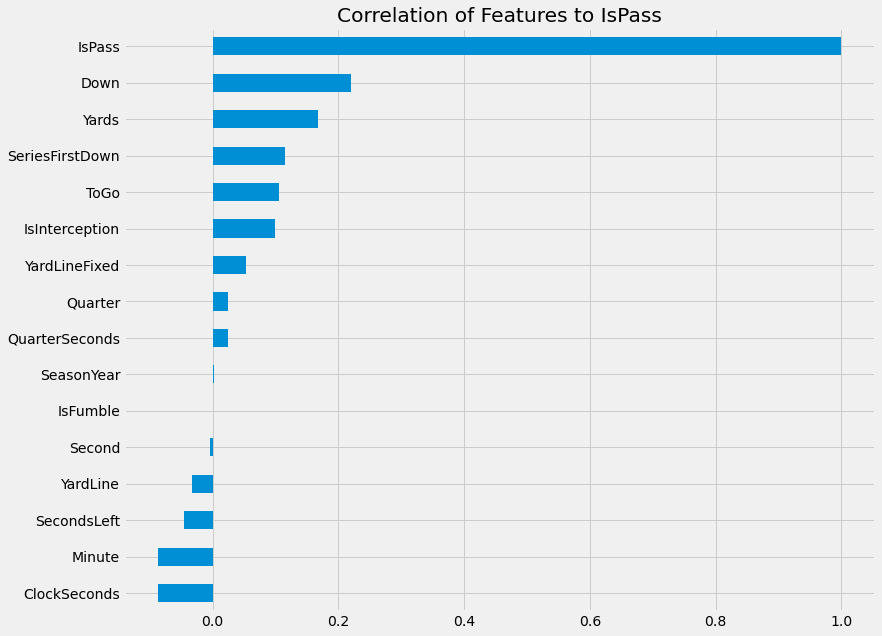

In [6]:
# Present visual for correlation of features versus IsPass
m.IsPass_correlation(df)

As we continue our exploration, we can use the above correlation chart to help guide ourselves and help find what will be impactful when predicting pass or run. 

Through the exploration process, additional questions were also brought up. These included the following:

- Has passing increased over the years?
- Is there a relationship between what down it is and passing the ball?
- Is there a linear relationship between current quarter and passing the ball?
- Has offensive produced yards increased over time?

These questions will be walked through using visuals and statistical test using functions out of the model.py file. Please feel free to take a look for a deeper dive.

---

### Question #1:
##### Have  number of passing and/or running plays increased over the last 5 seasons?

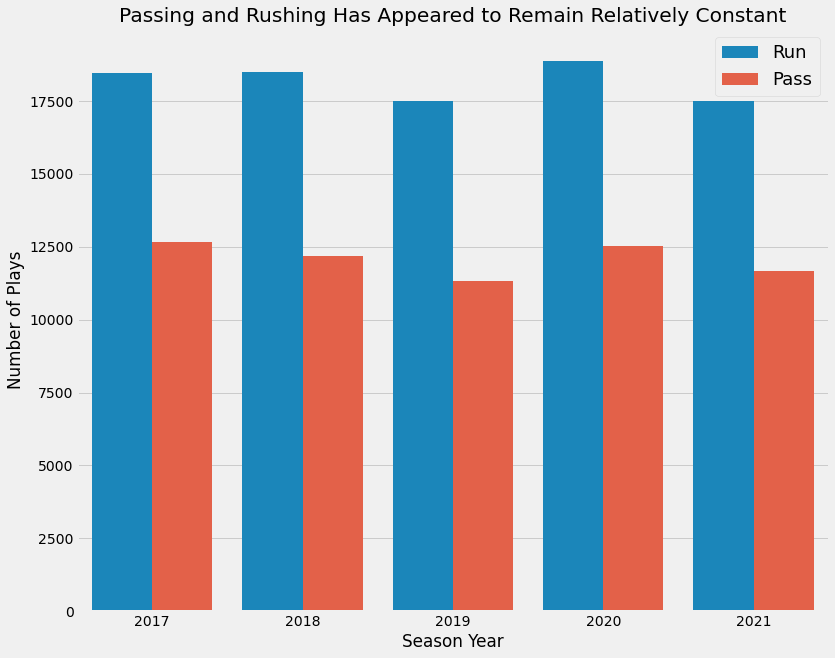

In [7]:
# Use function from model.py to pull visual for question 1
m.q1_viz(df)

### Answer to Question #1:
As the visual shows, the overall total of plays both passing and running have fluctuated a bit but remain on the relatively constant course of ~18,000 yards in passing and ~12,000 in rushing over the past 5 seasons.

---

### Question #2:
#### Has offensive yardage increased over the last 5 seasons?

In [8]:
# Use function from model.py to pull visual for question 2
m.q2_viz(df)

,Yards
SeasonYear,
2020,195736
2018,194828
2017,186368
2019,180045
2021,178064


### Answer to Question #2:
Using the above data frame, we can conclude by the rankings that offenses have not consistently increased total yardage over the last 5 seasons.

---

##### Now that we're more acquainted with our data, let's dive a into some relational questions that could possibly help us in our prediction model...

---

### Question #3:
#### Is there a relationship between what down it is and whether is results in a pass?

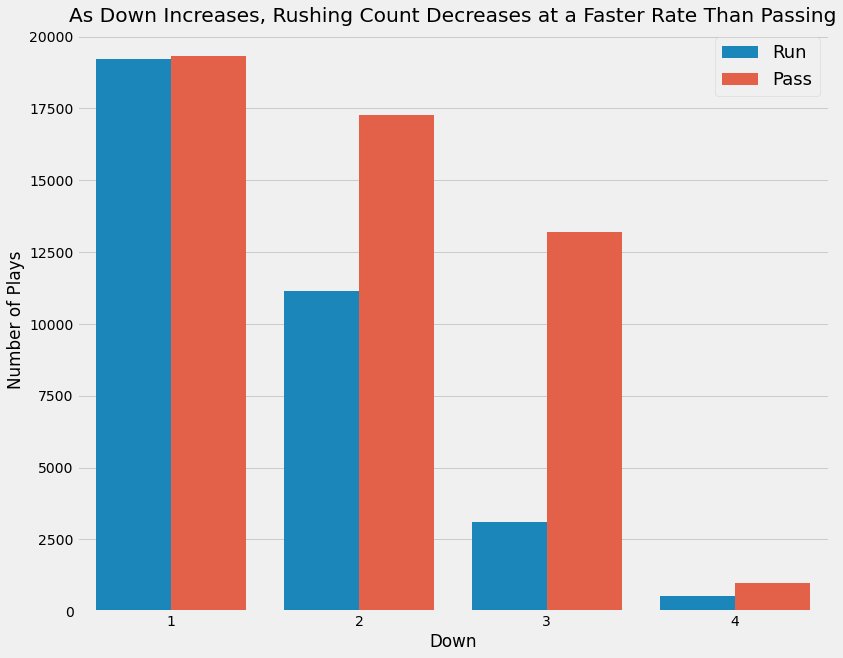

In [9]:
# Use function from model.py to pull visual for question 3
m.q3_viz(train)

There seems to be a pattern here. Let's follow up with a statistical test to ensure what we are seeing is true.

### Stats Test (Pearson's r):

#### Hypothesis:
 - H0: There is no linear relationship between down and whether it is a pass play.
 - Ha: There is linear relationship between down and whether it is a pass play.
 
Let's look at the results of our Pearson's r test...

In [10]:
# Use function from model.py to pull Pearson's r test results for question 3
m.q3_stats(train)

r = 0.21698781997451191
p = 0.0
-------------------------------------------------------------
We reject the hypothesis that there is no linear relationship 
between down and the play resulting in a pass.


### Answer to Question #3:
With the reinforcement of our Pearson's r, we can conclude that we cannot assume there is no linear relationship between the down and the play resulting in a pass.

---

### Question #4:
#### Are current quarter and passing the ball independent of each other?

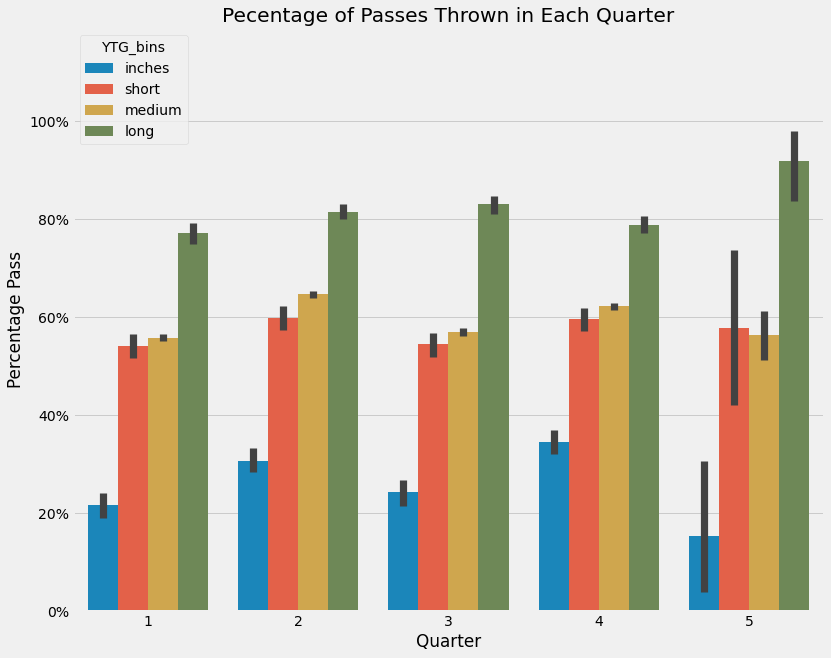

In [11]:
# Use function from model.py to pull visual for question 4
m.q4_viz(train)

There is an obvious independence between passing and long yardage situations here but there's less proof visually of passing plays' dependency on quarter. Let's look at this statistically with a Chi^2 test...

#### Stats Test (Chi^2):
#### Hypothesis:
 - H0: Pass is independent of the current quarter.
 - Ha: Pass is not independent of the current quarter.

In [12]:
# Use function from model.py to pull Chi^2 test results for question 3
m.q4_stats(train)

chi^2 = 377.8400
p     = 1.7047081952091722e-80
-----------------------------------------------------------------
We reject the hypothesis that IsPass and Quarter are independent.


### Answer to Question #4:
While our visual isn't very helpful, we can rely on our Chi^2 test to prove that we can reject the idea that IsPass and the quarter of play are independent of each other and look deeper into their dependency when it comes to modeling.

---

### Clustering:

With the above initial questions giving us a little insight, we can go forward with modeling. In addition, I also established a few extra useful features including the use of clustering. I created a 'togo_cluster' that was the most effective. This cluster can be added to other features during modeling. While you can see the other clusters created in my workbook along with their statistical results, the following are the results of the togo_cluster which combined the features ToGo (yards to go) and SecondsLeft (the amount of seconds left in the game).

Before doing anything related to modeling, I first scaled our data using a MinMaxScaler that normalized the data which allowed me to look at the varibles of the train, validate, and test datasets on a scale of 0 to 1. This process, once again, was made into a function from the wrangle.py file for ease of use...

In [13]:
# Use function from model.py to scale data using a MinMaxScaler
train_scaled, validate_scaled, test_scaled = w.min_max_scaler(train, validate, test)

Once scaled, our scaled datasets can be plugged into a function from our model.py file in order to create the togo_cluster for their relative datasets. Our original train, validate, and test are also used for our y variables.

In [14]:
# Use function from model.py in order to create a cluster and add it to the data frame
m.get_togo_cluster(train, train_scaled, validate, validate_scaled, test, test_scaled)

We can verify the cluster has been added to our data frames with a quick 'train.head(2) and a slide to the end of our data frame to see it in our last column:

In [15]:
# Ensure cluster was added
train.head(2)

,GameDate,Quarter,Minute,Second,OffenseTeam,DefenseTeam,Down,ToGo,YardLine,SeriesFirstDown,SeasonYear,Yards,Formation,PlayType,IsPass,IsInterception,IsFumble,YardLineFixed,YardLineDirection,YTG_bins,QuarterSeconds,ClockSeconds,SecondsLeft,togo_cluster
42319,2017-12-11,4,13,9,NE,MIA,2,3,97,1,2017,3,UNDER CENTER,PASS,1,0,0,3,OPP,short,3600,789,789,2
4651,2018-12-16,4,3,23,MIN,MIA,2,7,60,0,2018,5,UNDER CENTER,RUSH,0,0,0,40,OPP,medium,3600,203,203,2


---

### Modeling :

In order to move through modeling, we must first establish our baseline. The baseline for this dataset will be the most occuring (mode) result of our target 'IsPass'. This means our baseline will be equal to 1. Our basline percentage will be the average of the amount of plays that resulted in a pass. That percentage is the following:

In [16]:
# Use function from model.py to set baseline
m.baseline(train)

Baseline is 59.92%


With the baseline set at 59.92%, we now move to set our x's and y's for our train, validate, and test datasets. The x's for each will be the features we are using in our modeling. These include:

        - togo_cluster
        - Down
        - YardLine
        
Our target will be used to create our y's. Once again, that target is 'IsPass'. All this work is accessible using our 'set_x_and_y' function our of our model.py file.

In [17]:
# Use a function from model.py to set x's and y's for train, validate, and test
x_train, y_train, x_validate, y_validate, x_test, y_test = m.set_x_and_y(train, validate, test)

Once our x's and y's are established, we can input them into our modeling function out of our model.py file that runs a Logistical Regression, Decision Tree, Random Forest and K's Nearest Neighbors model and outputs each model's accuracy.

In [18]:
# Use function from model.py to run models and provide each result of the training and validation sets
m.model_accuracy(x_train, y_train, x_validate, y_validate, x_test, y_test)

Accuracy of Logistic Regression on the training set is 60.26%
Accuracy of Logistic Regression on the validation set is 60.46%
--------------------------------------------------------------------
Accuracy of Decision Tree Classifier on the training set is 62.39%
Accuracy of Decision Tree Classifier on the validation set is 62.50%
--------------------------------------------------------------------
Accuracy of Random Forest on the training set is 63.02%
Accuracy of Random Forest on the validation set is 62.11%
--------------------------------------------------------------------
Accuracy of KNN on the training set is 59.33%
Accuracy of KNN on the validation set is 58.60%


As seen above, our Decision Tree model performed the best on our validate set. This means that we can deem it as our 'Best Performer' for our data. Now we can run a Decision Tree model using our untouched test data in order to get a true idea of it's effectiveness. This can be done by using the 'decision_tree_best_on_test' function in our model.py file. The output will be a reinteration of our baseline, how accurate our model is on the untouched data, and the amount by which our model beat/didn't beat the baseline.

In [19]:
# Use the best model (Decision Tree) on the test data set and provide results
m.decision_tree_best_on_test(x_test, y_test, train)

Baseline Accuracy of Decision Tree Classifier is 59.92%
Accuracy of Decision Tree Classifier on the test set is 62.71%
------------------------------------------------------------------
Accuracy gained with use of the new model on the test set is 2.79%


---

### Conclusion:
The goals of this project were to identify drivers of pass plays in order to predict whether or not a play would result in a pass or run for NFL offenses. Key drivers found were the following:

    - Down
    - Yardline
    - togo_cluster (Yards to go along with seconds left in the game)

Using these drivers to help our model resulted in an increase of 2.79% over the baseline. 

#### Recommendation(s):
An increase of 2.79% isn't impactful enough to push the model forward to help with predictions in future or real time scenarios. The model must be further refined.

#### Next Steps:
With more time, I would like to:

- Work on more feature engineering and explore more relationships of categories to passing and/or running the ball.

- Explore other datasets to find and create features that will help refine our current model or result in the creation of a new model.
    
- Look into focusing on plays that happened on specific down and by specific teams.

---